In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [3]:
student_course_ratings_df = pd.read_csv('rs_content_test.csv')
student_course_ratings_df

,user,item,rating
0,1502801,RP0105EN,3.0
1,1609720,CNSC02EN,2.0
2,1347188,CO0301EN,3.0
3,755067,ML0103EN,3.0
4,538595,BD0115EN,3.0
...,...,...,...
9397,1385217,EE0101EN,3.0
9398,1864644,DA0101EN,3.0
9399,435858,TMP0105EN,3.0
9400,1888188,DB0101EN,3.0


In [4]:
test_students = student_course_ratings_df.groupby(['user']).max().reset_index(drop=False)
test_student_ids = test_students['user'].to_list()
print(f"Total numbers of test users: {len(test_student_ids)}")

Total numbers of test users: 1000


In [42]:
course_genres_df = pd.read_csv("course_genre.csv")
course_genres_df

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,excourse89,javascript jquery and json,0,0,0,0,0,0,0,0,0,0,0,1,1,0
303,excourse90,programming foundations with javascript html ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
304,excourse91,front end web development with react,0,0,0,0,0,0,0,0,0,0,0,0,1,0
305,excourse92,introduction to web development,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [43]:
all_courses = set(course_genres_df['COURSE_ID'].values)
len(all_courses)

307

In [44]:
profile_df = pd.read_csv("user_profile.csv")
profile_df

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,2102054,3.0,3.0,3.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,6.0,6.0,0.0,3.0
33897,2102356,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33898,2102680,3.0,6.0,6.0,0.0,0.0,14.0,0.0,9.0,0.0,0.0,3.0,0.0,0.0,0.0
33899,2102983,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
rating_sparse_df = student_course_ratings_df.pivot(index='user', columns='item', values='rating').fillna(0).reset_index().rename_axis(index=None, columns=None)
rating_sparse_df.head()

,user,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,...,SECM03EN,ST0101EN,SW0101EN,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0105EN,WA0101EN,WA0103EN
0,37465,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50348,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70434,0.0,0.0,0.0,0.0,3.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,85625,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2061096,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,2074313,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,2074462,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,2082818,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
user_df = rating_sparse_df.set_index('user')
cosine_sim = cosine_similarity(user_df)
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_df.index, columns=user_df.index)
cosine_sim_df

user,37465,50348,52091,70434,85625,108541,109915,134697,142685,149690,...,2050073,2052832,2056704,2056952,2057052,2061096,2074313,2074462,2082818,2087663
user,,,,,,,,,,,,,,,,,,,,,
37465,1.000000,0.309244,0.099449,0.350857,0.209657,0.676123,0.169031,0.179284,0.083592,0.629941,...,0.154303,0.308607,0.142857,0.534522,0.179284,0.569803,0.503953,0.000000,0.122988,0.257143
50348,0.309244,1.000000,0.143519,0.253167,0.151282,0.365902,0.243935,0.215610,0.180951,0.363636,...,0.445362,0.445362,0.412325,0.289271,0.388098,0.411152,0.454545,0.222681,0.128186,0.274883
52091,0.099449,0.143519,1.000000,0.000000,0.000000,0.117670,0.000000,0.208013,0.213370,0.087706,...,0.107417,0.214834,0.099449,0.186052,0.124808,0.158666,0.175412,0.107417,0.000000,0.358017
70434,0.350857,0.253167,0.000000,1.000000,0.514917,0.415139,0.138380,0.000000,0.114056,0.309426,...,0.000000,0.000000,0.000000,0.328196,0.000000,0.279887,0.206284,0.000000,0.100686,0.070171
85625,0.209657,0.151282,0.000000,0.514917,1.000000,0.248069,0.124035,0.000000,0.061340,0.277350,...,0.000000,0.000000,0.000000,0.196116,0.000000,0.167248,0.092450,0.000000,0.270746,0.062897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061096,0.569803,0.411152,0.158666,0.279887,0.167248,0.539360,0.269680,0.286039,0.200049,0.402015,...,0.246183,0.369274,0.341882,0.533002,0.429058,1.000000,0.502519,0.123091,0.000000,0.273505
2074313,0.503953,0.454545,0.175412,0.206284,0.092450,0.596285,0.298142,0.158114,0.294884,0.444444,...,0.272166,0.272166,0.503953,0.471405,0.316228,0.502519,1.000000,0.136083,0.108465,0.377964
2074462,0.000000,0.222681,0.107417,0.000000,0.000000,0.182574,0.182574,0.000000,0.180579,0.000000,...,0.166667,0.333333,0.154303,0.144338,0.193649,0.123091,0.136083,1.000000,0.000000,0.185164


In [47]:
train_ratio = 0.8
train_size = int(train_ratio * len(rating_sparse_df))
train_set = rating_sparse_df[:train_size]
test_set = rating_sparse_df[train_size:]

In [48]:
def calculate_mean_f1_score(relevant_labels, predicted_labels):
  f1 = f1_score(relevant_labels, predicted_labels)
  return f1

In [49]:
score_threshold = 30.0
res_dict = {}

def generate_recommendation_scores_CB():
    students = []
    courses = []
    title = []
    scores = []
    for student_id in test_student_ids:
        test_student_profile = profile_df[profile_df['user'] == student_id]
        test_student_vector = profile_df[profile_df['user'] == student_id].iloc[0, 1:].values
        enrolled_courses = student_course_ratings_df[student_course_ratings_df['user'] == student_id]['item'].to_list()
        unknown_courses = all_courses.difference(enrolled_courses)
        unknown_course_df = course_genres_df[course_genres_df['COURSE_ID'].isin(unknown_courses)]
        unknown_course_ids = list(unknown_course_df['COURSE_ID'])
        recommendation_scores = np.dot(unknown_course_df.iloc[:, 2:].values, test_student_vector)
        for i in range(0, len(unknown_course_ids)):
            score = recommendation_scores[i]
            if score >= score_threshold:
                students.append(student_id)
                courses.append(unknown_course_ids[i])
                scores.append(recommendation_scores[i])
                matching_rows = course_genres_df[course_genres_df['COURSE_ID'] == unknown_course_ids[i]]
                if not matching_rows.empty:
                  t = matching_rows.iloc[0]['TITLE']
                  title.append(t)

    return students, courses, scores, title

In [50]:
f1_scores_CF = []

def recommend_courses_CF(user_id, rating_df, similarity_df, top_n=5):
  user_ratings = rating_df.loc[user_id]
  user_similarity = similarity_df.loc[user_id]
  similar_users = user_similarity.sort_values(ascending=False)
  similar_users = similar_users.drop(user_id)
  similar_users = similar_users.head(50)
  similar_users_id = list(similar_users.index)
  unrated_courses = user_ratings[user_ratings == 0].index
  recommended_courses = []

  target_user_vec = (rating_sparse_df[rating_sparse_df['user'] == user_id].iloc[0]).tolist()
  target_user_vec.pop(0)
  target_user_binary = [1 if value != 0 else 0 for value in target_user_vec]
  user_f1_score = 0

  for same_user in similar_users_id:
    same_user_vec = (rating_sparse_df[rating_sparse_df['user'] == same_user].iloc[0]).tolist()
    same_user_vec.pop(0)
    same_user_binary = [1 if value != 0 else 0 for value in same_user_vec]
    user_f1_score += calculate_mean_f1_score(target_user_binary, same_user_binary)
  user_f1_score = user_f1_score / len(similar_users_id)
  f1_scores_CF.append(user_f1_score)

  for course in unrated_courses:
    course_ratings = rating_df[course]
    similar_users_ratings = rating_df.loc[similar_users.index, course]
    weighted_rating = (similar_users_ratings * similar_users).sum() / similar_users.sum()
    recommended_courses.append((course, weighted_rating))

  recommended_courses.sort(key=lambda x: x[1], reverse=True)

  return recommended_courses[:top_n]

In [51]:
test_set

,user,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,...,SECM03EN,ST0101EN,SW0101EN,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0105EN,WA0101EN,WA0103EN
800,1570208,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
801,1571241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
802,1571271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
803,1571316,3.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
804,1573190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2061096,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,2074313,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,2074462,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,2082818,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
user_id = 1502801	 # Give user_id of any of the users from the test_set
top_recommendations = recommend_courses_CF(user_id, user_df, cosine_sim_df, top_n=5)
print("Top recommended courses for user", user_id, ":")
for i, (course, weighted_rating) in enumerate(top_recommendations, start=1):
  print(f"{i}. Course: {course}, Weighted Rating: {weighted_rating}")

Top recommended courses for user 1502801 :
1. Course: PY0101EN, Weighted Rating: 0.8175383353094222
2. Course: DS0101EN, Weighted Rating: 0.7872563068900771
3. Course: SC0101EN, Weighted Rating: 0.7063380748522358
4. Course: BD0121EN, Weighted Rating: 0.6715216196489788
5. Course: BD0133EN, Weighted Rating: 0.47609147638974353


In [53]:
students, courses, scores, titles = generate_recommendation_scores_CB()
res_dict['STUDENT'] = students
res_dict['COURSE_ID'] = courses
res_dict['SCORE'] = scores

results_df = pd.DataFrame(res_dict, columns=['STUDENT', 'COURSE_ID', 'SCORE'])

# group to get top 5 recommended courses
grouped = results_df.groupby('STUDENT', group_keys=False)

def get_top_5(group):
  return group.sort_values(by='SCORE', ascending=False).head(5)

top_5_courses_df = grouped.apply(get_top_5)
top_5_courses_df.reset_index(drop=True, inplace=True)

In [54]:
sorted = top_5_courses_df.sort_values(by='SCORE', ascending=False)
# As can be seen from sorted df;
max_range = 99.0
min_range = 30.0
sorted

,STUDENT,COURSE_ID,SCORE
486,733707,RP0105EN,99.0
489,733707,excourse72,90.0
401,674939,excourse73,90.0
403,674939,SC0103EN,90.0
488,733707,TMP0105EN,90.0
...,...,...,...
85,403519,BD0145EN,30.0
35,271899,RP0105EN,30.0
36,271899,BD0145EN,30.0
84,403519,RP0105EN,30.0


In [55]:
def calculate_mae(actual, predicted):
  return mean_absolute_error(actual, predicted)

In [56]:
def calculate_rmse(actual, predicted):
  return np.sqrt(mean_squared_error(actual, predicted))

In [57]:
def calculate_mse(actual, predicted):
  return mean_squared_error(actual, predicted)

In [58]:
grouped_students = top_5_courses_df.groupby('STUDENT')
mae_scores_CB = []
rmse_scores_CB = []
mse_scores_CB = []
f1_scores_CB = []

for student, student_group in grouped_students:
  courses = list(student_group['COURSE_ID'])
  student_vec = profile_df[profile_df['user'] == student].iloc[0]
  student_vec = student_vec.tolist()[1:]
  student_vec = [0 if value < 5 else 1 for value in student_vec]

  course_mae_CB = 0
  course_rmse_CB = 0
  course_mse_CB = 0
  course_f1_CB = 0
  for course_i in courses:
    course_vec = course_genres_df[course_genres_df['COURSE_ID'] == course_i].iloc[0]
    course_vec = course_vec.tolist()[2:]
    course_mae_CB += calculate_mae(student_vec, course_vec)
    course_rmse_CB += calculate_rmse(student_vec, course_vec)
    course_mse_CB += calculate_mse(student_vec, course_vec)
    course_f1_CB += calculate_mean_f1_score(student_vec, course_vec)

  course_mae_CB = course_mae_CB / len(courses)
  course_rmse_CB = course_rmse_CB / len(courses)
  course_mse_CB = course_mse_CB / len(courses)
  course_f1_CB = course_f1_CB / len(courses)

  mae_scores_CB.append(course_mae_CB)
  rmse_scores_CB.append(course_rmse_CB)
  mse_scores_CB.append(course_mse_CB)
  f1_scores_CB.append(course_f1_CB)

mean_mae_CB = np.mean(mae_scores_CB)
mean_rmse_CB = np.mean(rmse_scores_CB)
mean_mse_CB = np.mean(mse_scores_CB)
mean_f1_score_CB = np.mean(f1_scores_CB)
print(f"Mean Absolute Error (MAE): {mean_mae_CB}")
print(f"Root Mean Square Error (RMSE): {mean_rmse_CB}")
print(f"Mean Square Error (MSE): {mean_mse_CB}")
print(f"F1-Score: {mean_f1_score_CB}")

Mean Absolute Error (MAE): 0.17608577633007597
Root Mean Square Error (RMSE): 0.37763340094384873
Mean Square Error (MSE): 0.17608577633007597
F1-Score: 0.7230541969792784


In [59]:
mae_scores = []
rmse_scores = []
mse_scores = []
recommendations_df = pd.DataFrame(columns=["STUDENT", "COURSE_ID", "SCORE"])

rows_to_append = []
for user_id in test_set['user']:
  recommended_courses = recommend_courses_CF(user_id, user_df, cosine_sim_df, top_n=5)
  for i, (course, weighted_rating) in enumerate(recommended_courses, start=1):
    row = {
            "STUDENT": user_id,
            "COURSE_ID": course,
            "SCORE": weighted_rating
        }
    rows_to_append.append(row)


recommendations_df = pd.concat([recommendations_df, pd.DataFrame(rows_to_append)])
recommendations_df.reset_index(drop=True, inplace=True)

actual_ratings = [user_df.loc[user_id, course] for course, _ in recommended_courses]
predicted_ratings = [rating for _, rating in recommended_courses]

mae_scores.append(calculate_mae(actual_ratings, predicted_ratings))
rmse_scores.append(calculate_rmse(actual_ratings, predicted_ratings))
mse_scores.append(calculate_mse(actual_ratings, predicted_ratings))

mean_mae = np.mean(mae_scores)
mean_rmse = np.mean(rmse_scores)
mean_mse = np.mean(mse_scores)
mean_f1_CF = np.mean(f1_scores_CF)

print(f"Mean Absolute Error (MAE): {mean_mae}")
print(f"Root Mean Square Error (RMSE): {mean_rmse}")
print(f"Mean Square Error (MSE): {mean_mse}")
print(f"F1-Score: {mean_f1_CF}")

Mean Absolute Error (MAE): 0.9471903496897804
Root Mean Square Error (RMSE): 0.9716336092662757
Mean Square Error (MSE): 0.9440718706558098
F1-Score: 0.567354486079499


In [60]:
max_range_CF = 2.396873
min_range_CF = 0.371172
recommendations_df.sort_values(by='SCORE', ascending=False)

,STUDENT,COURSE_ID,SCORE
500,1768789,PY0101EN,2.884724
115,1609720,PY0101EN,2.825429
240,1656151,PY0101EN,2.712046
20,1573190,PY0101EN,2.630712
590,1813704,PY0101EN,2.586811
...,...,...,...
824,1916547,DB0101EN,0.347452
854,1935753,CC0101EN,0.344689
354,1691612,DS0105EN,0.340493
469,1751931,BD0101EN,0.340311


In [61]:
top_5_courses_df

,STUDENT,COURSE_ID,SCORE
0,85625,RP0105EN,54.0
1,85625,BD0211EN,54.0
2,85625,excourse73,54.0
3,85625,excourse72,54.0
4,85625,excourse71,54.0
...,...,...,...
1396,2061096,excourse73,33.0
1397,2087663,SW0201EN,38.0
1398,2087663,SW0101EN,38.0
1399,2087663,TA0106EN,33.0


In [62]:
def map_column_to_range(df, column_name, target_range):
  df_mapped = df.copy()
  source_min = df[column_name].min()
  source_max = df[column_name].max()
  if source_max == source_min:
      raise ValueError("Source range has zero width.")
  target_min, target_max = target_range
  scaling_factor = (target_max - target_min) / (source_max - source_min)
  df_mapped[column_name] = 2*((df[column_name] - source_min) * scaling_factor + target_min)

  return df_mapped

In [63]:
mapped_df = map_column_to_range(top_5_courses_df, 'SCORE', (min_range_CF, max_range_CF))
mapped_df

,STUDENT,COURSE_ID,SCORE
0,85625,RP0105EN,2.151527
1,85625,BD0211EN,2.151527
2,85625,excourse73,2.151527
3,85625,excourse72,2.151527
4,85625,excourse71,2.151527
...,...,...,...
1396,2061096,excourse73,0.918492
1397,2087663,SW0201EN,1.212072
1398,2087663,SW0101EN,1.212072
1399,2087663,TA0106EN,0.918492


In [64]:
CB_CF = pd.concat([mapped_df, recommendations_df], axis = 0)
CB_CF

,STUDENT,COURSE_ID,SCORE
0,85625,RP0105EN,2.151527
1,85625,BD0211EN,2.151527
2,85625,excourse73,2.151527
3,85625,excourse72,2.151527
4,85625,excourse71,2.151527
...,...,...,...
995,2087663,BD0111EN,1.337362
996,2087663,DS0105EN,1.012427
997,2087663,ML0101ENv3,0.872155
998,2087663,DA0101EN,0.762000


In [65]:
hyb_mae = (mean_mae + mean_mae_CB) / 2
hyb_rmse = (mean_rmse + mean_rmse_CB)
hyb_mse = (mean_mse + mean_mse_CB) / 2
hyb_f1_score = (mean_f1_score_CB + mean_f1_CF) / 2

print(f"Mean Absolute Error (MAE): {hyb_mae}")
print(f"Root Mean Square Error (RMSE): {hyb_rmse}")
print(f"Mean Square Error (MSE): {hyb_mse}")
print(f"F1-Score: {hyb_f1_score}")

Mean Absolute Error (MAE): 0.5616380630099282
Root Mean Square Error (RMSE): 1.3492670102101245
Mean Square Error (MSE): 0.5600788234929429
F1-Score: 0.6452043415293887


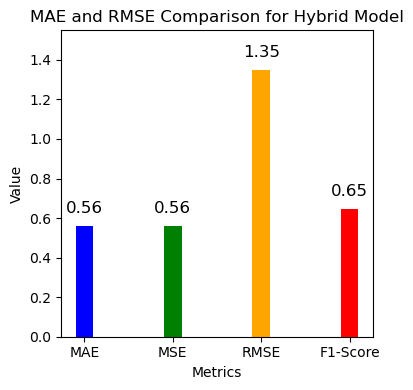

In [69]:
metrics = ['MAE', 'MSE', 'RMSE', 'F1-Score']
values = [hyb_mae, hyb_mse, hyb_rmse, hyb_f1_score]

# Create a bar plot
plt.figure(figsize=(4, 4))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'], width=0.2)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('MAE and RMSE Comparison for Hybrid Model')
plt.ylim(0, max(values) + 0.2)
for i, v in enumerate(values):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

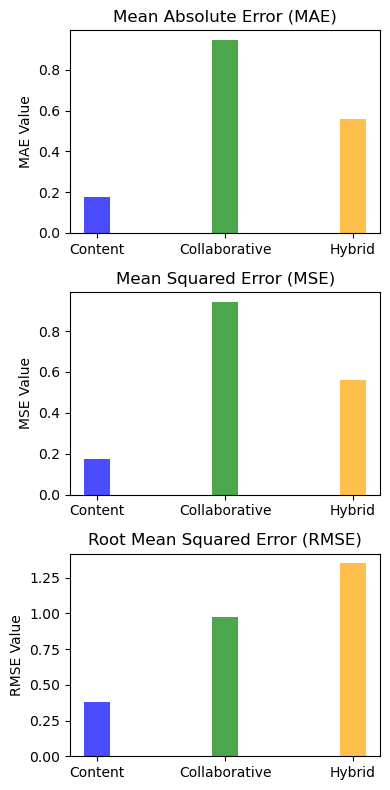

In [70]:
models = ['Content', 'Collaborative', 'Hybrid']

mae_values = [mean_mae_CB, mean_mae, hyb_mae]
mse_values = [mean_mse_CB, mean_mse, hyb_mse]
rmse_values = [mean_rmse_CB, mean_rmse, hyb_rmse]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(4, 8))

# Plot MAE
ax1.bar(models, mae_values, color=['blue', 'green', 'orange'], alpha=0.7, width=0.2)
ax1.set_title('Mean Absolute Error (MAE)')
ax1.set_ylabel('MAE Value')
# ax1.set_xticklabels(models, rotation=30)

# Plot MSE
ax2.bar(models, mse_values, color=['blue', 'green', 'orange'], alpha=0.7, width=0.2)
ax2.set_title('Mean Squared Error (MSE)')
ax2.set_ylabel('MSE Value')
# ax2.set_xticklabels(models, rotation=30)

# Plot RMSE
ax3.bar(models, rmse_values, color=['blue', 'green', 'orange'], alpha=0.7, width=0.2)
ax3.set_title('Root Mean Squared Error (RMSE)')
ax3.set_ylabel('RMSE Value')
# ax3.set_xticklabels(models, rotation=30)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

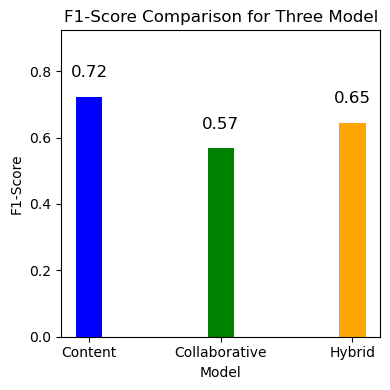

In [71]:
metrics = ['Content', 'Collaborative', 'Hybrid']
values = [mean_f1_score_CB, mean_f1_CF, hyb_f1_score]

# Create a bar plot
plt.figure(figsize=(4, 4))
plt.bar(metrics, values, width=0.2, color=['blue', 'green', 'orange'])
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score Comparison for Three Model')
plt.ylim(0, max(values) + 0.2)
for i, v in enumerate(values):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()